In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
metropolitandata = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
metropolitandata.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [3]:
metropolitandata.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


In [4]:
metropolitandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
land_area         99 non-null int64
percent_city      99 non-null float64
percent_senior    99 non-null float64
physicians        99 non-null int64
hospital_beds     99 non-null int64
graduates         99 non-null float64
work_force        99 non-null float64
income            99 non-null int64
region            99 non-null int64
crime_rate        99 non-null float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [5]:
metropolitandata.columns

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region',
       'crime_rate'],
      dtype='object')

In [6]:
metropolitandata['hospital_beds'].notnull().sum()

99

In [7]:
metropolitandata['region'].value_counts()

3    36
2    25
1    21
4    17
Name: region, dtype: int64

In [8]:
corrmatrix = metropolitandata.corr()
corrmatrix

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


In [9]:
metropolitandata[metropolitandata['region'] == 4]

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19
13,782,28.4,7.8,3119,8656,70.5,915.2,12591,4,63.20
14,4226,38.1,9.8,3285,5392,67.8,699.8,10918,4,64.05
18,27293,25.3,12.3,2018,6323,57.4,510.6,7399,4,76.03
20,9155,53.8,11.1,2280,6450,60.1,575.2,7766,4,85.62
25,3434,28.9,8.3,1844,3215,65.1,422.6,5909,4,77.94
33,596,100.0,6.0,1260,2819,66.0,319.9,5181,4,64.98
53,5966,39.5,9.6,737,1907,52.7,246.6,3007,4,80.94
54,1863,50.4,7.7,674,2989,63.8,194.8,2747,4,53.76
59,1676,36.6,9.2,505,3297,60.7,156.3,2689,4,57.37


In [10]:
regionone = metropolitandata[metropolitandata['region'] == 1]
crimeinregionone = regionone[regionone['crime_rate'] >= 54.16]
crimeinregionone

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
10,1008,16.6,10.3,4006,16704,55.9,935.5,15953,1,54.16
24,2966,26.9,10.3,2053,6604,56.3,450.4,6966,1,56.55
55,192,60.5,10.8,617,1789,44.1,212.6,3158,1,58.79


In [11]:
regionthree = metropolitandata[metropolitandata['region'] == 3]
landarea = metropolitandata[metropolitandata['land_area'] >= 5000]
total = landarea[landarea['region'] != 3]
print(len(regionthree))
print(len(landarea))
print(len(total))
totalregionthreelandarea = regionthree + landarea
print(len(totalregionthreelandarea))

36
8
5
41


In [12]:
regionfour = metropolitandata[metropolitandata['region'] == 4]
crimeinregionfour = regionfour[regionfour['crime_rate'] == 55.64]
print(crimeinregionfour)
print(len(crimeinregionfour))


Empty DataFrame
Columns: [land_area, percent_city, percent_senior, physicians, hospital_beds, graduates, work_force, income, region, crime_rate]
Index: []
0


In [13]:
crimeinregionfour_a = regionfour[regionfour['crime_rate'] == 85.62]

print(len(crimeinregionfour_a))
crimeinregionfour_a

1


,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
20,9155,53.8,11.1,2280,6450,60.1,575.2,7766,4,85.62


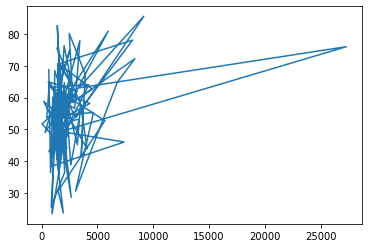

In [14]:
plt.plot(metropolitandata['land_area'], metropolitandata['crime_rate'])
plt.show()

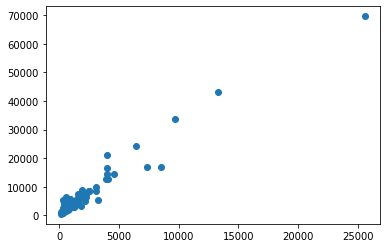

In [15]:
plt.scatter(metropolitandata['physicians'], metropolitandata['hospital_beds'])
plt.show()

In [16]:
metropolitandata['region'].unique()

array([1, 2, 4, 3], dtype=int64)

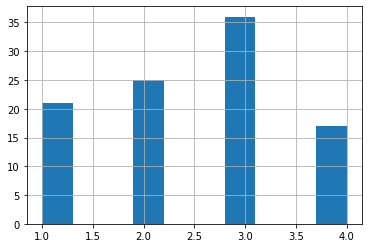

In [17]:
metropolitandata['region'].hist()
plt.show()

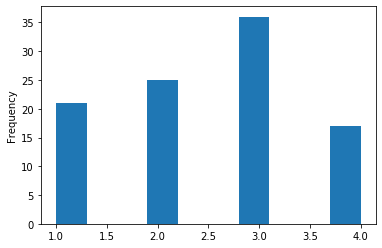

In [18]:
metropolitandata['region'].plot(kind='hist')
plt.show()

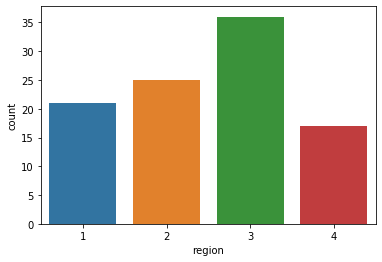

In [19]:
ax = sn.countplot(x="region",data=metropolitandata)

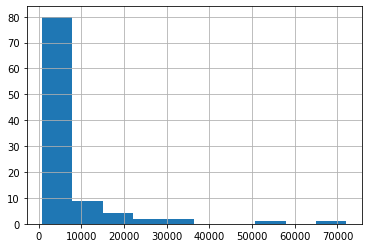

In [20]:
metropolitandata['income'].hist()
plt.show()